In [29]:
import seaborn as sns
import pandas as pd 
import datetime as datetime
import matplotlib.pyplot as plt
from IPython.display import display, HTML
import numpy as np
# Read data from file 'filename.csv' |
# (in the same directory that your python process is based)
# Control delimiters, rows, column names with read_csv (see later) 
pd.options.display.float_format = '{:,.2f}'.format
data = pd.read_csv("/home/anconam/projects/Shapley_Pruning/experiments/results/log.csv.testpruning") 
data['timestamp'].apply(lambda row: str(row))
data.tail()

,timestamp,epoch,train_acc,test_acc,test_acc_pp,train_loss,test_loss,test_loss_pp,n_params,flops,n_params_full,layers,train_time,prune_time,experiment
66,20200201T202806,0.33,0,0.10,0.43,0,2.30,2.26,"29,692,188.00","3,703,215.00","45,645,248.00",1039-2024,0.00,24.52,mnist__sv-loss#5_gap:0.0_steps:2_start:0_int:1
67,20200201T202806,0.67,0,0.43,0.41,0,2.26,2.26,"29,449,248.00","3,672,690.00","45,645,248.00",1024-2024,0.00,7.30,mnist__sv-loss#5_gap:0.0_steps:2_start:0_int:1
68,20200201T202843,0.00,0,0.10,0.10,0,2.30,2.30,"45,645,248.00","5,707,690.00","45,645,248.00",2024-2024,0.00,0.00,mnist__taylor_gap:0.0_steps:2_start:0_int:1
69,20200201T202843,0.33,0,0.10,0.46,0,2.30,2.26,"29,611,208.00","3,693,040.00","45,645,248.00",1034-2024,0.00,0.94,mnist__taylor_gap:0.0_steps:2_start:0_int:1
70,20200201T202843,0.67,0,0.46,0.45,0,2.26,2.26,"29,206,308.00","3,642,165.00","45,645,248.00",1009-2024,0.00,0.91,mnist__taylor_gap:0.0_steps:2_start:0_int:1


In [41]:
dataset = "cifar10"

plot_df = data[data["experiment"].str.startswith(dataset)]
# plot_df = plot_df[plot_df["timestamp"] >= "20200116T164457"]
# plot_df = plot_df[~plot_df["experiment"].str.contains("prunedyn_sv")]
# plot_df = plot_df[~plot_df["experiment"].str.contains("in1ep")]
# plot_df = plot_df[~plot_df["experiment"].str.contains("random")]
# plot_df = plot_df[~plot_df["experiment"].str.contains("30steps")]

# Some processing
plot_df['test_acc'] *= 100
plot_df['test_acc_pp'] *= 100

plot_df['train_acc'] *= 100
plot_df["sparsity"] = plot_df["n_params"] / plot_df["n_params_full"] * 100
plot_df["test_acc_gap"] = (plot_df["test_acc"] - plot_df["test_acc"].max()) / plot_df["test_acc"].max() * 100


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

In [43]:
df_join = plot_df[plot_df["epoch"] > 0.6]
df_join.groupby(["experiment"]).mean().sort_values(by=["test_acc_pp"], ascending=False)

# df_join.groupby(["experiment"]).std().sort_values(by=["test_acc_pp"], ascending=False)

,epoch,train_acc,test_acc,test_acc_pp,train_loss,test_loss,test_loss_pp,n_params,flops,n_params_full,train_time,prune_time,sparsity,test_acc_gap
experiment,,,,,,,,,,,,,,
cifar10__taylor_gap:0.0_steps:2_start:0_int:1,0.67,0,19.76,22.21,0,2.24,2.24,"61,683,092.80","7,698,800.00","82,692,544.00",0.00,7.29,74.59,-13.12
cifar10__sv-loss#5_gap:0.0_steps:2_start:0_int:1,0.67,0,19.68,21.42,0,2.24,2.23,"64,318,182.00","8,029,894.50","82,692,544.00",0.00,7.82,77.78,-13.45


In [28]:
df_join.groupby(["experiment"]).std().sort_values(by=["test_acc_pp"], ascending=False)


,epoch,train_acc,test_acc,test_acc_pp,train_loss,test_loss,test_loss_pp,n_params,flops,n_params_full,train_time,prune_time,sparsity,test_acc_gap
experiment,,,,,,,,,,,,,,


In [4]:
# Rank pruning methods by Test Accuracy at the epoch of Minimum Test Loss
# df_join = plot_df[plot_df["sparsity"] < 100]
# df_join = df_join[df_join["epoch"] > 25]
df_join = plot_df.join(plot_df.groupby(["timestamp"])["test_loss"].min(), on="timestamp", rsuffix="_min")
df_join = df_join[df_join["test_loss"] == df_join["test_loss_min"]]
std = df_join.groupby(["experiment"]).std().sort_values(by=["test_acc"], ascending=False)
pp_std = df_join.groupby(["experiment"]).std().sort_values(by=["test_acc_pp"], ascending=False)

df_join = df_join.groupby(["experiment"]).mean().sort_values(by=["test_acc"], ascending=False)
df_join["test_acc_std"] = std["test_acc"]
df_join["test_acc_pp_std"] = std["test_acc_pp"]
df_join.filter(["experiment", "test_acc","test_acc_std", "test_acc_pp","test_acc_pp_std",  "test_acc_gap", "sparsity", "epoch", "test_loss"])

,test_acc,test_acc_std,test_acc_pp,test_acc_pp_std,test_acc_gap,sparsity,epoch,test_loss
experiment,,,,,,,,
mnist__intgrad_gap:0.0_steps:2_start:0_int:1,9.82,1.28,40.16,4.95,-16.32,100.00,0,2.30
mnist__random_gap:0.0_steps:2_start:0_int:1,9.82,1.28,9.82,1.28,-16.32,100.00,0,2.30
mnist__sv-loss#15_gap:0.0_steps:2_start:0_int:1,9.82,1.28,39.51,4.38,-16.32,100.00,0,2.30
mnist__taylor_gap:0.0_steps:2_start:0_int:1,9.82,1.28,41.62,3.81,-16.32,100.00,0,2.30


In [5]:
# Rank pruning methods by best test accuracy during training and sparsity at that stage
df_join = plot_df.join(plot_df.groupby(["timestamp"])["test_acc"].max(), on="timestamp", rsuffix="_max")
df_join = df_join[df_join["test_acc"] == df_join["test_acc_max"]]
df_join = df_join.groupby(["experiment"]).mean().sort_values(by=["test_acc"], ascending=False)
df_join.filter(["experiment", "test_acc", "test_acc_gap", "sparsity", "flops", "epoch", "test_loss"])

,test_acc,test_acc_gap,sparsity,flops,epoch,test_loss
experiment,,,,,,
mnist__intgrad_gap:0.0_steps:2_start:0_int:1,9.82,-16.32,100.00,"5,707,690.00",0,2.30
mnist__random_gap:0.0_steps:2_start:0_int:1,9.82,-16.32,100.00,"5,707,690.00",0,2.30
mnist__sv-loss#15_gap:0.0_steps:2_start:0_int:1,9.82,-16.32,100.00,"5,707,690.00",0,2.30
mnist__taylor_gap:0.0_steps:2_start:0_int:1,9.82,-16.32,100.00,"5,707,690.00",0,2.30


Accuracy
                                                 test_acc
experiment                                               
mnist__intgrad_gap:0.0_steps:2_start:0_int:1         9.82
mnist__random_gap:0.0_steps:2_start:0_int:1          9.82
mnist__sv-loss#15_gap:0.0_steps:2_start:0_int:1      9.82
mnist__taylor_gap:0.0_steps:2_start:0_int:1          9.82
Training time
                                                 train_time  prune_time
experiment                                                             
mnist__intgrad_gap:0.0_steps:2_start:0_int:1           0.00        0.91
mnist__random_gap:0.0_steps:2_start:0_int:1            0.00        0.01
mnist__sv-loss#15_gap:0.0_steps:2_start:0_int:1        0.00        8.40
mnist__taylor_gap:0.0_steps:2_start:0_int:1            0.00        0.71
Sparsity
                                                 n_params
experiment                                               
mnist__intgrad_gap:0.0_steps:2_start:0_int:1       100.00
mnist__random_

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


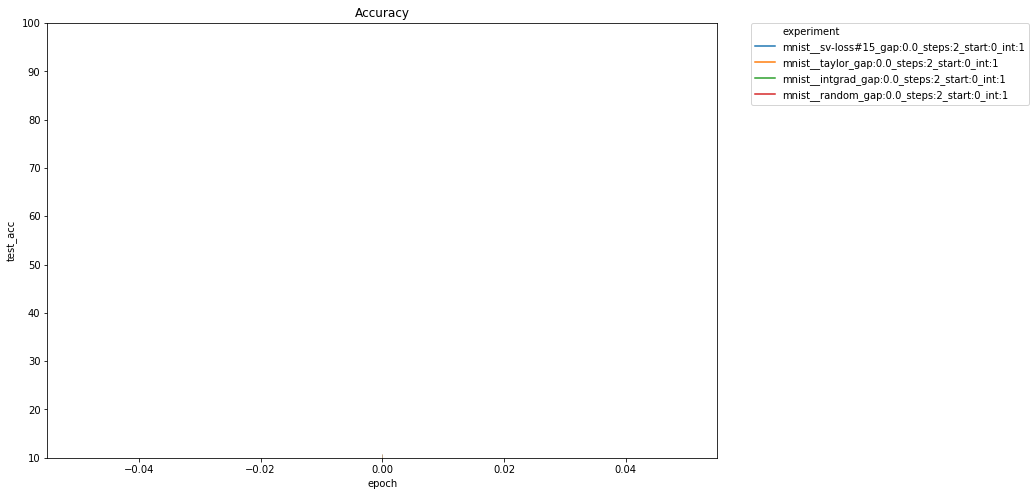

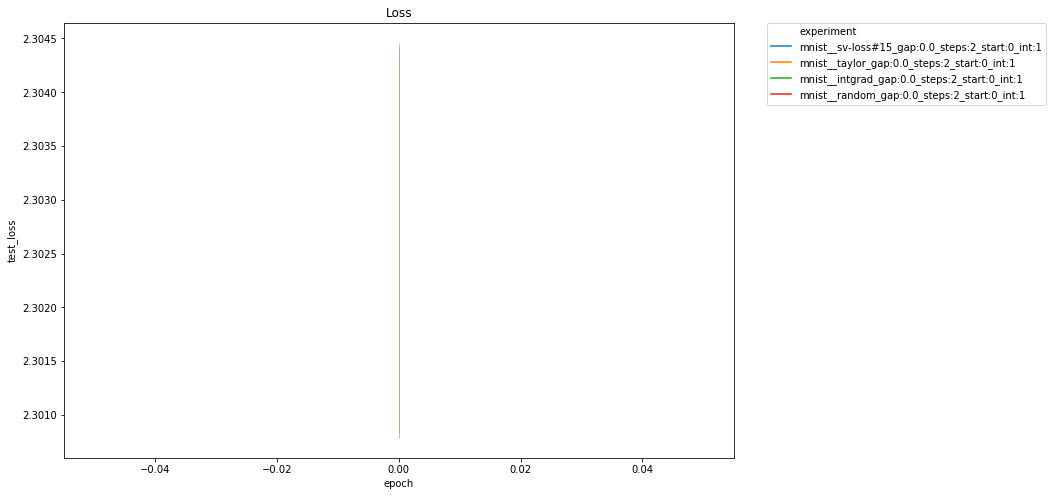

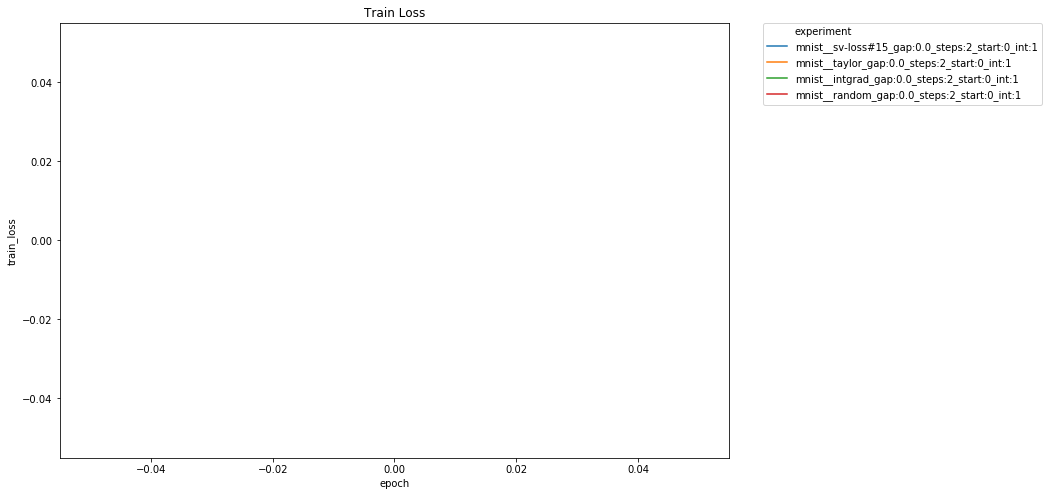

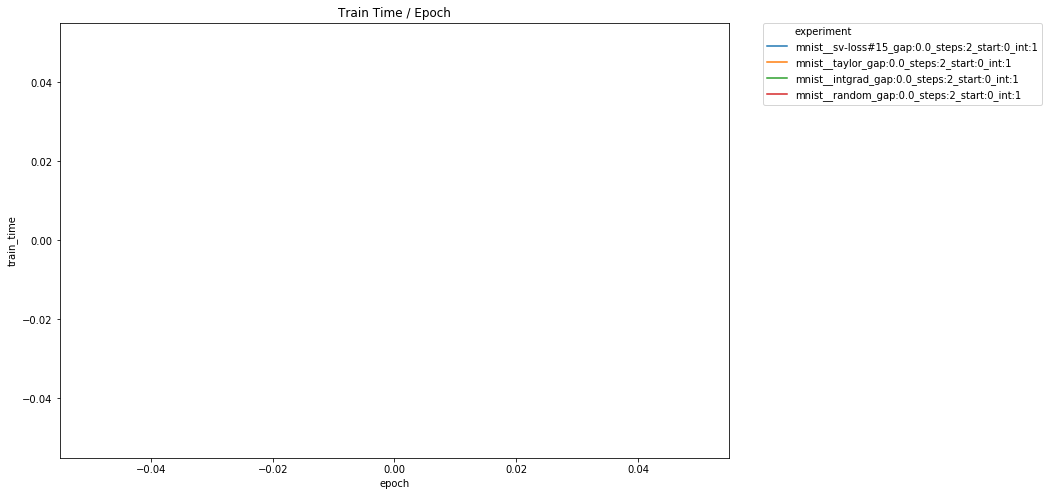

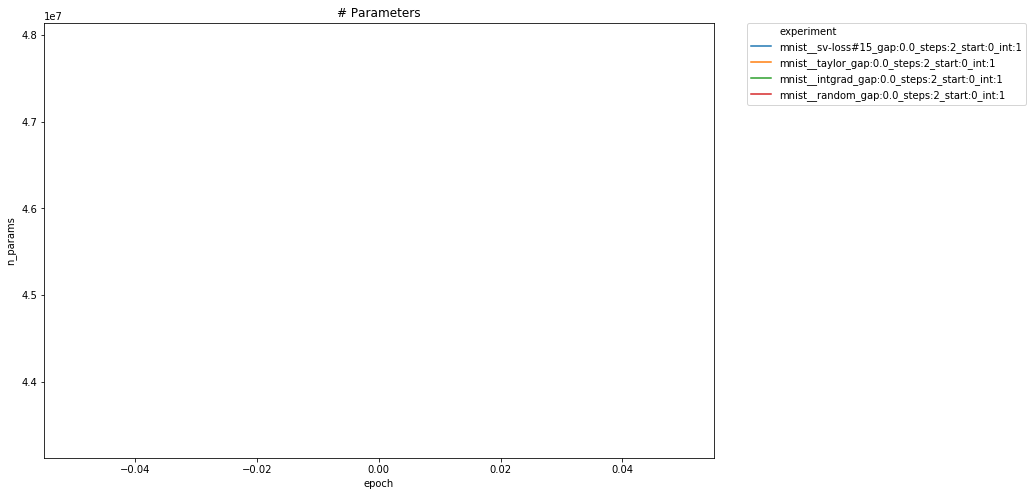

In [6]:


# Print train time
print ("Accuracy")
performance_df = plot_df.groupby(['experiment', 'timestamp']).max()
performance_df = performance_df.groupby(['experiment']).mean()
print (performance_df.filter(items=["experiment", "test_acc"]))

# Print train time
print ("Training time")
time_df = plot_df.groupby(['experiment', 'timestamp']).sum()
time_df = time_df.groupby(['experiment']).mean()
print (time_df.filter(items=["experiment", "train_time", "prune_time"]))

# Weight sparsity
print ("Sparsity")
initial_params = np.max(list(plot_df.groupby(['experiment'])["n_params"].max()))
# print (initial_params)
sparsity_df = plot_df.groupby(['experiment', 'timestamp']).min()
sparsity_df = sparsity_df.groupby(['experiment']).min()
print (sparsity_df.filter(items=["experiment", "n_params"]) / initial_params * 100)


# for label in plotting_data:
plt.figure(figsize=(12,8))
sns.lineplot(x="epoch", y="test_acc", hue="experiment", data = plot_df)
plt.title("Accuracy")
plt.ylim([10, 100])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# plt.figure(figsize=(12,8))
# new_plot = plot_df
# new_plot["train_time_cum"] = new_plot.groupby(['experiment', 'timestamp'])['train_time'].apply(lambda x: x.cumsum())
# sns.lineplot(x="train_time_cum", y="test_acc", hue="experiment", data = new_plot)
# plt.title("Accuracy / Wall-clock Time")
# plt.ylim([0.8, 0.98])
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.figure(figsize=(12,8))
ax = sns.lineplot(x="epoch", y="test_loss", hue="experiment", data = plot_df)
plt.title("Loss")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.figure(figsize=(12,8))
ax = sns.lineplot(x="epoch", y="train_loss", hue="experiment", data = plot_df)
plt.title("Train Loss")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.figure(figsize=(12,8))
ax = sns.lineplot(x="epoch", y="train_time", hue="experiment", data = plot_df)
plt.title("Train Time / Epoch")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.figure(figsize=(12,8))
ax = sns.lineplot(x="epoch", y="n_params", hue="experiment", data = plot_df)
plt.title("# Parameters")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
